### Contents <a class="anchor" id="sections"></a>

- [1. Getting started](#section1)
- [2. Interest over time](#section2)
- [3. Related topics](#section3)
- [4. Related queries](#section4)
- [5. Suggestions](#section5)
- [6. Trending searches](#section6)
- [7. Trending charts](#section7)

### 1. Getting started <a class="anchor" id="section1"></a>
`pytrends.build_payload`

In [1]:
# Imports method from pytrends module
from pytrends.request import TrendReq

# Executes the method
pytrends = TrendReq(hl='en-US', tz=360)

# Define a list of keywords to search (note: max of 5)
kw_list = ['cats', 'dogs', 'bitcoin', 'nintendo', 'tiger king']

# Builds the payload
pytrends.build_payload(kw_list=kw_list, timeframe='today 5-y', geo='US', gprop='')

### 2. Interest over time <a class="anchor" id="section2"></a>
`pytrends.interest_over_time`

In [5]:
import pandas as pd

# DataFrame
# - how selected keywords changed in popularity over time
df = pytrends.interest_over_time()
display(df.head(), df.tail())

,cats,dogs,bitcoin,nintendo,tiger king,isPartial
date,,,,,,
2017-01-22,20,59,3,15,0,False
2017-01-29,21,56,3,15,0,False
2017-02-05,20,54,3,16,0,False
2017-02-12,20,56,3,14,0,False
2017-02-19,20,57,4,20,0,False


,cats,dogs,bitcoin,nintendo,tiger king,isPartial
date,,,,,,
2021-12-19,23,58,17,28,0,False
2021-12-26,23,61,16,26,1,False
2022-01-02,22,58,19,15,0,False
2022-01-09,23,57,19,14,0,False
2022-01-16,25,64,14,16,0,True


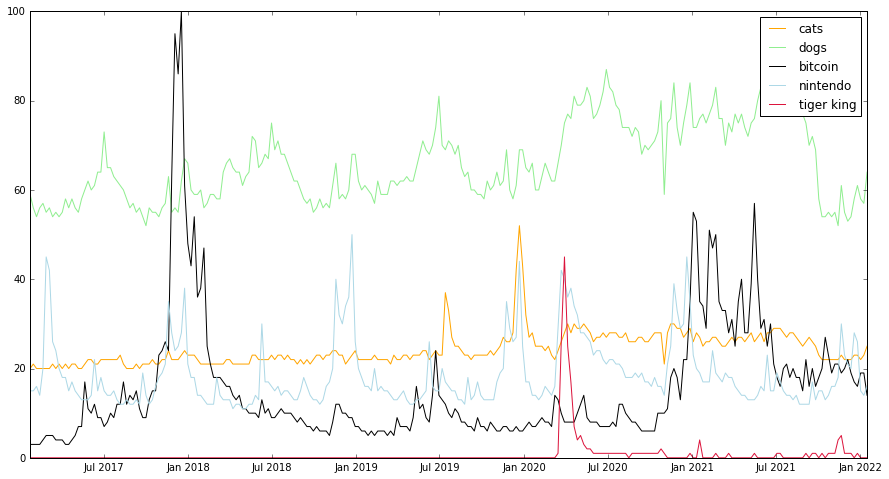

In [6]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Plot a figure
plt.figure(figsize=[15,8])
plt.plot(df.index, df['cats'], 'orange')
plt.plot(df.index, df['dogs'], 'lightgreen')
plt.plot(df.index, df['bitcoin'], 'black')
plt.plot(df.index, df['nintendo'], 'lightblue')
plt.plot(df.index, df['tiger king'], 'crimson')
# Legend
plt.legend(['cats', 'dogs', 'bitcoin', 'nintendo', 'tiger king'])
plt.show()

### 3. Related topics <a class="anchor" id="section3"></a>
`[topic_title]`

In [10]:
# Payload
# - keyword 'bitcoin'
pytrends.build_payload(kw_list=['bitcoin'], timeframe='today 5-y', geo='US', gprop='')

# Stores data in dictionary
df_rt = pytrends.related_topics()

# Function
def keysAndSubkeys(dictionary):
    '''Extracts keys / subkeys from dictionary'''
    for x in dictionary.keys():
        print('Key:', x,'\n')
    for x in pd.json_normalize(dictionary).columns:
        print('Subkey:', x.replace('bitcoin.',''))
        
# Call the funciton
keysAndSubkeys(df_rt)

Key: bitcoin 

Subkey: rising
Subkey: top


In [6]:
# Subkey 'rising'
display(df_rt['bitcoin']['rising'].head())

# Returns the top 5 rising topics related to keyword
for i in df_rt['bitcoin']['rising']['topic_title'].head():
    print(i)

,value,formattedValue,link,topic_mid,topic_title,topic_type
0,30100,Breakout,/trends/explore?q=/g/11gf2dcwbj&date=today+5-y...,/g/11gf2dcwbj,Cardano,Blockchain platform
1,27600,Breakout,/trends/explore?q=/g/11hcz1r4wl&date=today+5-y...,/g/11hcz1r4wl,Binance,Cryptocurrency exchange company
2,20050,Breakout,/trends/explore?q=/g/1ym82y1nc&date=today+5-y&...,/g/1ym82y1nc,NYSE:AMC,Topic
3,16050,Breakout,/trends/explore?q=/g/11f3n37thk&date=today+5-y...,/g/11f3n37thk,TRON,Cryptocurrency
4,15950,Breakout,/trends/explore?q=/g/11f9_gl16q&date=today+5-y...,/g/11f9_gl16q,NYSE:NIO,Topic


Cardano
Binance
NYSE:AMC
TRON
NYSE:NIO


In [7]:
# Subkey 'top'
display(df_rt['bitcoin']['top'].head())

# Returns the top 5 topics related to keyword
for i in df_rt['bitcoin']['top']['topic_title'].head():
    print(i)

,value,formattedValue,hasData,link,topic_mid,topic_title,topic_type
0,100,100,True,/trends/explore?q=/m/05p0rrx&date=today+5-y&ge...,/m/05p0rrx,Bitcoin,Currency
1,47,47,True,/trends/explore?q=/m/01d_1l&date=today+5-y&geo=US,/m/01d_1l,Price,Topic
2,7,7,True,/trends/explore?q=/m/077mq&date=today+5-y&geo=US,/m/077mq,Stock,Topic
3,5,5,True,/trends/explore?q=/m/09nqf&date=today+5-y&geo=US,/m/09nqf,United States Dollar,Currency
4,4,4,True,/trends/explore?q=/m/0108bn2x&date=today+5-y&g...,/m/0108bn2x,Ethereum,Topic


Bitcoin
Price
Stock
United States Dollar
Ethereum


### 4. Related queries <a class="anchor" id="section4"></a>
`['query']`

In [11]:
# Payload
# - keyword 'bitcoin'
pytrends.build_payload(kw_list=['bitcoin'], timeframe='today 5-y', geo='US', gprop='')

# Stores data in dictionary
df_rt2 = pytrends.related_queries()

# Call function
keysAndSubkeys(df_rt2)

Key: bitcoin 

Subkey: top
Subkey: rising


In [12]:
# Subkey 'top'
display(df_rt2['bitcoin']['top'].head())

# Returns top 5 queries related to keyword
for i in df_rt2['bitcoin']['top']['query'].head():
    print(i)

,query,value
0,price bitcoin,100
1,bitcoin stock,14
2,bitcoin stock price,9
3,bitcoin usd,8
4,ethereum,7


price bitcoin
bitcoin stock
bitcoin stock price
bitcoin usd
ethereum


In [14]:
# Subkey 'rising'
display(df_rt2['bitcoin']['rising'].head())

# Returns top 5 rising queries related to keyword
for i in df_rt2['bitcoin']['rising']['query'].head():
    print(i)

,query,value
0,cardano,33950
1,amc stock,26250
2,cardano price,24250
3,gme,23400
4,nio stock,17500


cardano
amc stock
cardano price
gme
nio stock


### 5. Suggestions <a class="anchor" id="section5"></a>
`pytrends.suggestions`

In [15]:
# Stores data in a DataFrame
# - unlike the previous methods pytrends.suggestions` does not require a payload
dfSuggestions = pytrends.suggestions('bitcoin')

# DataFrame
display(pd.DataFrame(dfSuggestions))

,mid,title,type
0,/m/05p0rrx,Bitcoin,Currency
1,/g/11gdq16zww,Bitcoin.com,Topic
2,/m/0y4vk1r,Kraken,Topic
3,/g/11d_wtvc5k,Bitcoin Cash,Cryptocurrency
4,/g/11df7j1stc,Mercado Bitcoin,Financial institution in Brazil


### 6. Trending searches <a class="anchor" id="section6"></a>
`pytrends.trending_searches`

In [16]:
# Trending search results in the US 
# - pn: represents the country we want to gather the trending searches from
display(pytrends.trending_searches(pn='united_states').head())

,0
0,Gaspard Ulliel
1,Carhartt
2,Ukraine
3,Mac Miller
4,Yvette Mimieux


### 7. Trending charts <a class="anchor" id="section7"></a>

##### `Top search results - Global 2020`

In [13]:
# View the top search results for Global-2020
display(pytrends.top_charts(date=2020, hl='en-US', tz=360, geo='GLOBAL'))

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


In [14]:
# View the top search results for Global-2015
display(pytrends.top_charts(date=2015, hl='en-US', tz=360, geo='GLOBAL'))

,title,exploreQuery
0,Lamar Odom,
1,Charlie Hebdo,
2,Agar.io,
3,Jurassic World,
4,Paris,
5,Furious 7,
6,Fallout 4,
7,Ronda Rousey,
8,Caitlyn Jenner,
9,American Sniper,


In [15]:
# View the top search results for Global-2010
display(pytrends.top_charts(date=2010, hl='en-US', tz=360, geo='GLOBAL'))

,title,exploreQuery
0,iPad,
1,iPhone 4,
2,Nokia 5530,
3,HTC EVO 4g,
4,Nokia N900,
5,Blackberry Apps,
6,Duracell myGrid,
7,트위터,
8,OtterBox,
9,PdaNet,


In [17]:
# View the top search results for Global-2005
display(pytrends.top_charts(date=2005, hl='en-US', tz=360, geo='GLOBAL'))

,title,exploreQuery
0,iPod,
1,Digital Camera,
2,MP3 Player,
3,iPod Mini,
4,PlayStation Portable,
5,Laptop,
6,Xbox,
7,iPod Shuffle,
8,Computer Desk,
9,iPod Nano,


[Return to contents](#sections)